=== Simulation de la loi de X ===
Paramètre n = 10, nombre de simulations = 1000
Espérance empirique   : 3.7520
Ecart-type empirique : 2.1397
Espérance théorique  : 3.6667
Ecart-type théorique : 2.2111


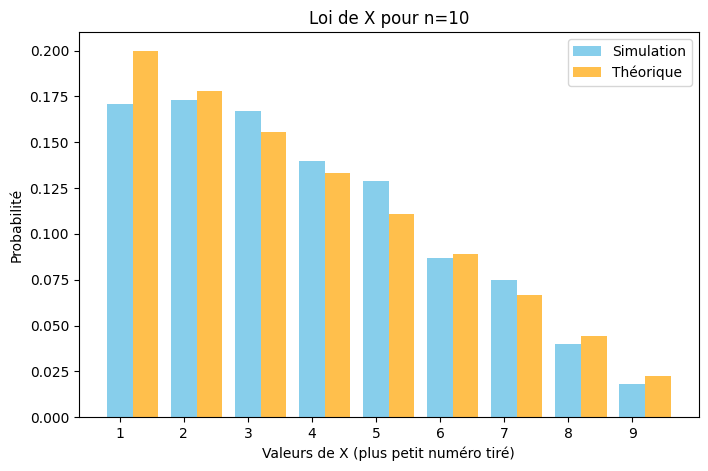

In [11]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math

def simulation_loi_X(n=10, Nsim=100000):
    if n <= 1:
        raise ValueError("n doit être >= 2")

    # Simuler les tirages : on prend 2 entiers distincts entre 1 et n
    X = []
    for _ in range(Nsim):
        a = random.randint(1, n)
        b = random.randint(1, n)
        while b == a:  # pour assurer sans remise
            b = random.randint(1, n)
        X.append(min(a, b))
    X = np.array(X)

    # Histogramme empirique
    valeurs, counts = np.unique(X, return_counts=True)
    proba_empirique = counts / Nsim

    # Loi théorique
    k_vals = np.arange(1, n)
    proba_theorique = 2*(n - k_vals) / (n*(n-1))

    # Espérance et variance théoriques
    E_theo = (n + 1)/3
    Var_theo = (n**2 - n - 2)/18
    sigma_theo = math.sqrt(Var_theo)

    # Empiriques
    E_emp = np.mean(X)
    sigma_emp = np.std(X)

    # --- Résultats ---
    print("=== Simulation de la loi de X ===")
    print(f"Paramètre n = {n}, nombre de simulations = {Nsim}")
    print(f"Espérance empirique   : {E_emp:.4f}")
    print(f"Ecart-type empirique : {sigma_emp:.4f}")
    print(f"Espérance théorique  : {E_theo:.4f}")
    print(f"Ecart-type théorique : {sigma_theo:.4f}")

    # --- Histogrammes ---
    plt.figure(figsize=(8,5))
    plt.bar(valeurs, proba_empirique, width=0.4, color="skyblue", label="Simulation", align="center")
    plt.bar(k_vals+0.4, proba_theorique, width=0.4, color="orange", alpha=0.7, label="Théorique", align="center")
    plt.xticks(k_vals)
    plt.xlabel("Valeurs de X (plus petit numéro tiré)")
    plt.ylabel("Probabilité")
    plt.title(f"Loi de X pour n={n}")
    plt.legend()
    plt.show()


# -------------------------------
# Exécution
# -------------------------------
simulation_loi_X(n=10, Nsim=1000)


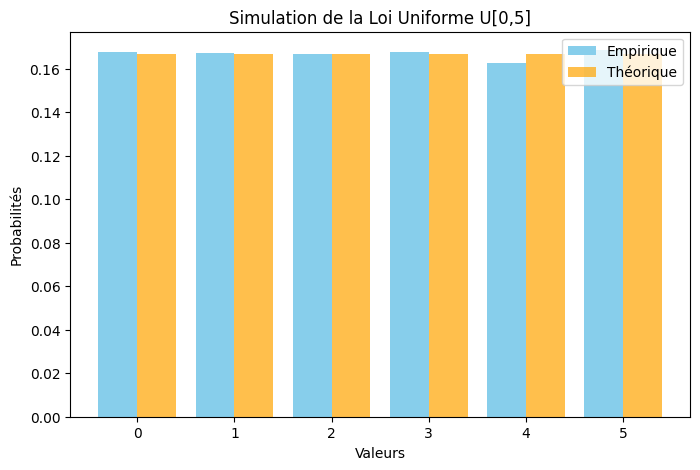

=== Loi Uniforme U[0,5] ===
Espérance empirique   : 2.4956
Ecart-type empirique : 1.7104
Espérance théorique  : 2.5000
Ecart-type théorique : 1.7078



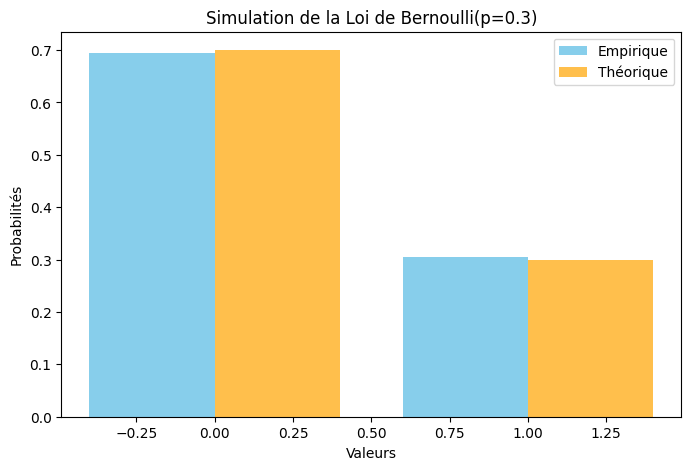

=== Loi de Bernoulli(p=0.3) ===
Espérance empirique   : 0.3052
Ecart-type empirique : 0.4605
Espérance théorique  : 0.3000
Ecart-type théorique : 0.4583



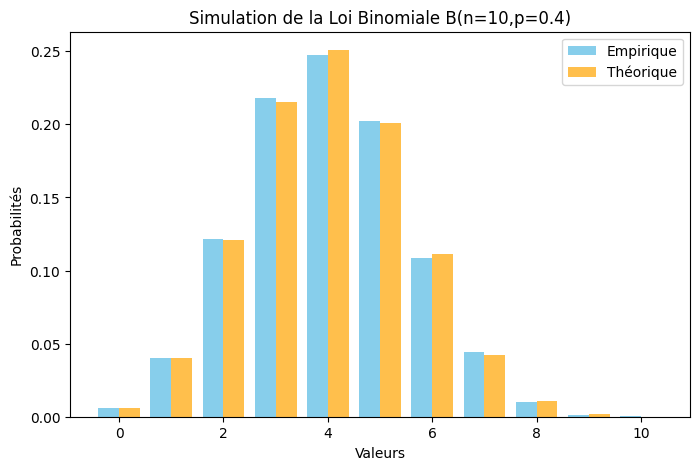

=== Loi Binomiale B(n=10,p=0.4) ===
Espérance empirique   : 3.9916
Ecart-type empirique : 1.5472
Espérance théorique  : 4.0000
Ecart-type théorique : 1.5492



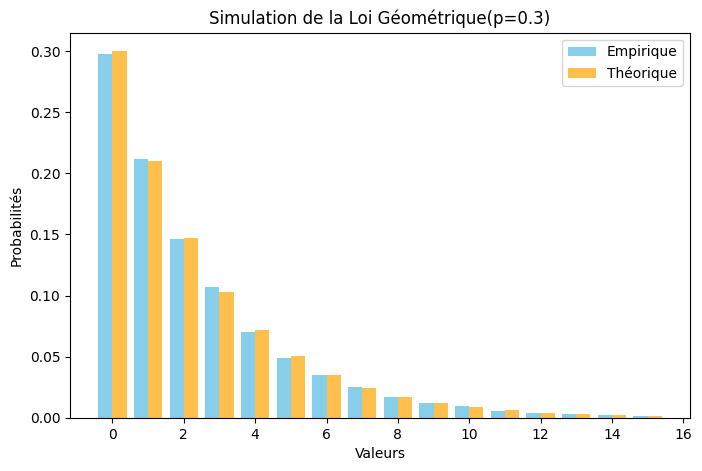

=== Loi Géométrique(p=0.3) ===
Espérance empirique   : 2.3296
Ecart-type empirique : 2.7593
Espérance théorique  : 2.2724
Ecart-type théorique : 2.6265



In [12]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import Counter

# ------------------------------
# 1) Fonctions de simulation
# ------------------------------
def LoiUniforme(n):
    return random.randint(0, n)

def LoiBernoulli(p):
    return 1 if random.random() < p else 0

def LoiBinomiale(n, p):
    return sum(LoiBernoulli(p) for _ in range(n))

def LoiGeometrique(p):
    k = 0
    while LoiBernoulli(p) == 0:
        k += 1
    return k

# ------------------------------
# 2) Fonction de test générique
# ------------------------------
def tester_loi(simulateur, params, Nsim, support, proba_theo, nom_loi):
    # Simulation
    data = [simulateur(*params) for _ in range(Nsim)]
    counts = Counter(data)
    valeurs = np.array(support)
    freq_emp = np.array([counts.get(k, 0)/Nsim for k in support])

    # Affichage histogrammes
    plt.figure(figsize=(8,5))
    plt.bar(valeurs-0.2, freq_emp, width=0.4, label="Empirique", color="skyblue")
    plt.bar(valeurs+0.2, proba_theo, width=0.4, label="Théorique", color="orange", alpha=0.7)
    plt.xlabel("Valeurs")
    plt.ylabel("Probabilités")
    plt.title(f"Simulation de la {nom_loi}")
    plt.legend()
    plt.show()

    # Espérance et écart-type empiriques
    E_emp = np.mean(data)
    sigma_emp = np.std(data)

    # Espérance et écart-type théoriques
    E_theo = np.sum(valeurs * proba_theo)
    Var_theo = np.sum((valeurs - E_theo)**2 * proba_theo)
    sigma_theo = math.sqrt(Var_theo)

    print(f"=== {nom_loi} ===")
    print(f"Espérance empirique   : {E_emp:.4f}")
    print(f"Ecart-type empirique : {sigma_emp:.4f}")
    print(f"Espérance théorique  : {E_theo:.4f}")
    print(f"Ecart-type théorique : {sigma_theo:.4f}")
    print()


# ------------------------------
# 3) Tests des lois
# ------------------------------
Nsim = 10000

# Loi Uniforme U{0,...,n}
n = 5
support = np.arange(0, n+1)
proba_theo = np.ones(n+1)/(n+1)
tester_loi(LoiUniforme, (n,), Nsim, support, proba_theo, f"Loi Uniforme U[0,{n}]")

# Loi de Bernoulli(p)
p = 0.3
support = [0,1]
proba_theo = [1-p, p]
tester_loi(LoiBernoulli, (p,), Nsim, support, proba_theo, f"Loi de Bernoulli(p={p})")

# Loi Binomiale(n,p)
n, p = 10, 0.4
support = np.arange(0, n+1)
proba_theo = [math.comb(n,k)*(p**k)*((1-p)**(n-k)) for k in support]
tester_loi(LoiBinomiale, (n,p), Nsim, support, proba_theo, f"Loi Binomiale B(n={n},p={p})")

# Loi Géométrique(p) : support = 0,1,2,...
p = 0.3
max_k = 15  # on tronque pour l'affichage
support = np.arange(0, max_k+1)
proba_theo = [(1-p)**k * p for k in support]
tester_loi(LoiGeometrique, (p,), Nsim, support, proba_theo, f"Loi Géométrique(p={p})")
